<a href="https://colab.research.google.com/github/adalves-ufabc/2023.Q3-PLN/blob/main/2023_Q3_PLN_AULA_10_Notebook_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2023.Q3]**
Prof. Alexandre Donizeti Alves

## **Modelos de Linguagem com N-gramas**
---



Um **Modelo de Linguagem com N-gramas** é um tipo de modelo estatístico usado em PLN para prever a probabilidade de uma sequência de palavras ocorrer em um determinado contexto.



O "**N**" em "**N-grama**" refere-se ao número de palavras que o modelo leva em consideração de cada vez para fazer suas previsões.

O **Modelo de Linguagem com N-gramas** funciona calculando a probabilidade condicional de uma palavra dada as **n-1** palavras anteriores. Isso é conhecido como **Modelo de Markov** de ordem **n-1**, onde **n-1** é o número de palavras que o modelo leva em consideração para prever a próxima palavra.

Vamos supor que temos o seguinte conjunto de frases (córpus):

    "Eu gosto de estudar matemática."
    "Matemática é minha matéria favorita na escola."
    "Eu sempre tive dificuldade em matemática."



Podemos usar um **Modelo de Linguagem com N-gramas** para prever a probabilidade de uma palavra aparecer dado o contexto de palavras que a antecedem. Por exemplo, se usarmos um modelo de linguagem com `2-gramas`, podemos calcular a probabilidade de uma palavra aparecer dado a palavra anterior.



Assim, se quisermos prever a próxima palavra após **`Eu gosto de`**, usamos o modelo de linguagem com `2-gramas` para calcular a probabilidade condicional da próxima palavra, que seria:

    Probabilidade de "estudar" dado "Eu gosto de" = 1/1 = 100%
    Probabilidade de "ler" dado "Eu gosto de" = 0/1 = 0%



Nesse caso, o modelo prevê que a próxima palavra após **`Eu gosto de`** será **`estudar`** com 100% de probabilidade, já que é a única palavra que aparece após esse conjunto de palavras nas frases fornecidas.



Esse é apenas um exemplo simplificado para ilustrar como um modelo de linguagem com n-gramas funciona. Na prática, usamos modelos mais complexos com um grande número de frases e palavras para criar modelos de linguagem mais precisos.

**NLTK**

Vamos ver um exemplo de como extrair **`n-gramas`** usando a biblioteca `NLTK` em `Python`. Suponha que temos o seguinte texto:

In [ ]:
texto = "O cachorro correu pelo parque e brincou com a bola."

Podemos extrair os **bigramas** (**`2-gramas`**) do texto da seguinte maneira:

In [ ]:
from nltk.util import ngrams

# tokenizar o texto
texto_tokenizado = texto.split()

# gerar os bigramas
bigramas = ngrams(texto_tokenizado, 2)

In [ ]:
# imprimir bigramas
for bigrama in bigramas:
    print(bigrama)

('O', 'cachorro')
('cachorro', 'correu')
('correu', 'pelo')
('pelo', 'parque')
('parque', 'e')
('e', 'brincou')
('brincou', 'com')
('com', 'a')
('a', 'bola.')


De maneira similar, podemos extrair trigramas e quadrigramas, por exemplo:

In [ ]:
# gerar os trigramas
trigramas = ngrams(texto_tokenizado, 3)

# imprimir os trigramas
for trigrama in trigramas:
    print(trigrama)

('O', 'cachorro', 'correu')
('cachorro', 'correu', 'pelo')
('correu', 'pelo', 'parque')
('pelo', 'parque', 'e')
('parque', 'e', 'brincou')
('e', 'brincou', 'com')
('brincou', 'com', 'a')
('com', 'a', 'bola.')


In [ ]:
# gerar os quadrigramas
quadrigramas = ngrams(texto_tokenizado, 4)

# imprimir os quadrigramas
for quadrigrama in quadrigramas:
    print(quadrigrama)

('O', 'cachorro', 'correu', 'pelo')
('cachorro', 'correu', 'pelo', 'parque')
('correu', 'pelo', 'parque', 'e')
('pelo', 'parque', 'e', 'brincou')
('parque', 'e', 'brincou', 'com')
('e', 'brincou', 'com', 'a')
('brincou', 'com', 'a', 'bola.')


**TextBlob**

In [ ]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from textblob import TextBlob

text = "O cachorro correu pelo parque e brincou com a bola."
blob = TextBlob(text)

# gerar os bigramas
bigramas = list(blob.ngrams(2))

print(bigramas)

[WordList(['O', 'cachorro']), WordList(['cachorro', 'correu']), WordList(['correu', 'pelo']), WordList(['pelo', 'parque']), WordList(['parque', 'e']), WordList(['e', 'brincou']), WordList(['brincou', 'com']), WordList(['com', 'a']), WordList(['a', 'bola'])]


In [ ]:
# gerar os trigramas
trigramas = list(blob.ngrams(3))

print(trigramas)

[WordList(['O', 'cachorro', 'correu']), WordList(['cachorro', 'correu', 'pelo']), WordList(['correu', 'pelo', 'parque']), WordList(['pelo', 'parque', 'e']), WordList(['parque', 'e', 'brincou']), WordList(['e', 'brincou', 'com']), WordList(['brincou', 'com', 'a']), WordList(['com', 'a', 'bola'])]


**Scikit-learn**

Aqui está um exemplo simples de como extrair **bigramas** usando a biblioteca `Scikit-learn` em `Python`:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# definir os documentos (corpus)
documentos = ["o cachorro correu pelo parque",
             "o cachorro brincou com a bola",
             "a bola era azul"]

# criar o vetorizador de n-gramas
vetorizador = CountVectorizer(ngram_range=(2,2))

# extrair os bigramas
vetorizador.fit_transform(documentos)

<3x8 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [ ]:
# imprimir os bigramas
print(vetorizador.get_feature_names_out())

['bola era' 'brincou com' 'cachorro brincou' 'cachorro correu' 'com bola'
 'correu pelo' 'era azul' 'pelo parque']


Neste exemplo, usamos a classe `CountVectorizer` da biblioteca `Scikit-learn` para criar um vetorizador de bigramas a partir de uma lista de documentos de exemplo. Passamos o argumento `ngram_range=(2,2)` para especificar que queremos bigramas, e chamamos o método `fit_transform `para extrair os bigramas dos documentos. Finalmente, imprimimos os bigramas usando o método `get_feature_names_out` do vetorizador.

Aqui está um exemplo simples de como extrair **trigramas** usando a biblioteca `Scikit-learn` em `Python`:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# definir os documentos (corpus)
documentos = ["o cachorro correu pelo parque",
             "o cachorro brincou com a bola",
             "a bola era azul"]

# criar o vetorizador de n-gramas
vetorizador = CountVectorizer(ngram_range=(3,3))

# extrai os trigramas
vetorizador.fit_transform(documentos)

# imprimir os trigramas
print(vetorizador.get_feature_names_out())

['bola era azul' 'brincou com bola' 'cachorro brincou com'
 'cachorro correu pelo' 'correu pelo parque']


Aqui está um exemplo de como extrair **unigramas** e **bigramas** usando a biblioteca `Scikit-learn` em `Python`:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# definir os documentos (corpus)
avaliacoes = ["Este filme é incrível, recomendo para todos!",
              "Muito bom, gostei bastante",
              "Não gostei muito do filme, achei meio parado",
              "Uma experiência horrível, não assistam!",
              "Maravilhoso, não vejo a hora de assistir de novo!"]

# criar o vetorizador de unigramas e bigramas
vetorizador = CountVectorizer(ngram_range=(1,2))

# extrair os unigramas e bigramas
vetorizador.fit_transform(avaliacoes)

<5x51 sparse matrix of type '<class 'numpy.int64'>'
	with 56 stored elements in Compressed Sparse Row format>

In [ ]:
# imprimir os unigramas e bigramas extraídos
print("Unigramas e bigramas:")
print(len(vetorizador.get_feature_names_out()))
print(vetorizador.get_feature_names_out())

Unigramas e bigramas:
51
['achei' 'achei meio' 'assistam' 'assistir' 'assistir de' 'bastante' 'bom'
 'bom gostei' 'de' 'de assistir' 'de novo' 'do' 'do filme' 'este'
 'este filme' 'experiência' 'experiência horrível' 'filme' 'filme achei'
 'filme incrível' 'gostei' 'gostei bastante' 'gostei muito' 'hora'
 'hora de' 'horrível' 'horrível não' 'incrível' 'incrível recomendo'
 'maravilhoso' 'maravilhoso não' 'meio' 'meio parado' 'muito' 'muito bom'
 'muito do' 'novo' 'não' 'não assistam' 'não gostei' 'não vejo' 'para'
 'para todos' 'parado' 'recomendo' 'recomendo para' 'todos' 'uma'
 'uma experiência' 'vejo' 'vejo hora']


## **Exemplos**
---

Suponha que temos o seguinte conjunto de dados:

In [ ]:
dados = ["o rato roeu a roupa do rei de roma",
         "uma casa de papel",
         "o rato comeu o queijo",
         "o cachorro late muito",
         "o rato roeu livremente",
         "a janela quebrou",
         "a porta está aberta"]

Nosso objetivo é construir um **Modelo de Linguagem** com base nos **`n-gramas`** dessas frases e usá-lo para prever a próxima palavra em uma dada frase.



Para isso, vamos usar a biblioteca **`NLTK`** em `Python` para tokenizar as frases em palavras e construir os **`n-gramas`**.

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
from nltk.util import ngrams
from collections import Counter

In [ ]:
# tokenizar as frases
dados_tokenizados = [nltk.word_tokenize(sentenca) for sentenca in dados]

# criar os bigramas
bigramas = []
for sentenca in dados_tokenizados:
    bigramas_sentenca = ngrams(sentenca, 2)
    bigramas.extend(bigramas_sentenca)

# contagem dos bigramas
contagem_bigramas = Counter(bigramas)

In [ ]:
contagem_bigramas

Counter({('o', 'rato'): 3,
         ('rato', 'roeu'): 2,
         ('roeu', 'a'): 1,
         ('a', 'roupa'): 1,
         ('roupa', 'do'): 1,
         ('do', 'rei'): 1,
         ('rei', 'de'): 1,
         ('de', 'roma'): 1,
         ('uma', 'casa'): 1,
         ('casa', 'de'): 1,
         ('de', 'papel'): 1,
         ('rato', 'comeu'): 1,
         ('comeu', 'o'): 1,
         ('o', 'queijo'): 1,
         ('o', 'cachorro'): 1,
         ('cachorro', 'late'): 1,
         ('late', 'muito'): 1,
         ('roeu', 'livremente'): 1,
         ('a', 'janela'): 1,
         ('janela', 'quebrou'): 1,
         ('a', 'porta'): 1,
         ('porta', 'está'): 1,
         ('está', 'aberta'): 1})

In [ ]:
# calcular as probabilidades condicionais
def predicao_proxima_palavra(palavra, contagem_bigramas):
    proximas_palavras_possiveis = []
    for bigrama in contagem_bigramas:
        if bigrama[0] == palavra:
            proximas_palavras_possiveis.append((bigrama[1], contagem_bigramas[bigrama]))
    return proximas_palavras_possiveis

Neste exemplo, estamos construindo um modelo de bigramas e testando-o com a palavra **`rato`**.

O modelo retorna uma lista das possíveis palavras seguintes, juntamente com a frequência de cada bigrama observado nos dados:

In [ ]:
# teste do modelo
print(predicao_proxima_palavra("rato", contagem_bigramas))

[('roeu', 2), ('comeu', 1)]


Aqui está outro exemplo que usa um modelo de linguagem com bigramas para prever a próxima palavra em uma frase:

In [ ]:
from nltk.util import ngrams
from collections import defaultdict

In [ ]:
# texto
texto = "O rato roeu a roupa do rei de Roma. E a rainha ficou só."

# treinar modelo de linguagem com bigramas
tokens = nltk.word_tokenize(texto.lower())
bigramas = list(ngrams(tokens, 2))

modelo = defaultdict(lambda: defaultdict(lambda: 0))
for w1, w2 in bigramas:
    modelo[w1][w2] += 1

In [ ]:
# prever a proxima palavra em uma frase
def predicao_proxima_palavra(sentenca):

    tokens = nltk.word_tokenize(sentenca.lower())

    ultima_palavra = tokens[-1]
    probabilidade_proxima_palavra = modelo[ultima_palavra]
    if len(probabilidade_proxima_palavra) == 0:
        return None
    return max(probabilidade_proxima_palavra, key=probabilidade_proxima_palavra.get)

In [ ]:
# teste
sentenca = "O rato roeu a roupa do"

proxima_palavra = predicao_proxima_palavra(sentenca)

print(f"A próxima palavra em '{sentenca}' é '{proxima_palavra}'.")

A próxima palavra em 'O rato roeu a roupa do' é 'rei'.


Aqui está um exemplo que usa um modelo de linguagem com **trigramas** para prever a próxima palavra com base em duas palavras anteriores:

In [ ]:
import nltk

# texto
texto = "O rato roeu a roupa do rei de Roma. E a rainha ficou só."

# tokenizar palavras e criar trigramas
tokens = nltk.word_tokenize(texto.lower())
trigramas = list(nltk.trigrams(tokens))

In [ ]:
# criar dicionario de trigramas com suas frequências
trigramas_contagem = {}
for trigrama in trigramas:
    if trigrama[:2] not in trigramas_contagem:
        trigramas_contagem[trigrama[:2]] = {}
    if trigrama[2] not in trigramas_contagem[trigrama[:2]]:
        trigramas_contagem[trigrama[:2]][trigrama[2]] = 0
    trigramas_contagem[trigrama[:2]][trigrama[2]] += 1

In [ ]:
trigramas_contagem

{('o', 'rato'): {'roeu': 1},
 ('rato', 'roeu'): {'a': 1},
 ('roeu', 'a'): {'roupa': 1},
 ('a', 'roupa'): {'do': 1},
 ('roupa', 'do'): {'rei': 1},
 ('do', 'rei'): {'de': 1},
 ('rei', 'de'): {'roma': 1},
 ('de', 'roma'): {'.': 1},
 ('roma', '.'): {'e': 1},
 ('.', 'e'): {'a': 1},
 ('e', 'a'): {'rainha': 1},
 ('a', 'rainha'): {'ficou': 1},
 ('rainha', 'ficou'): {'só': 1},
 ('ficou', 'só'): {'.': 1}}

In [ ]:
# funcao para prever proxima palavra com base em duas palavras anteriores
def predicao_proxima_palavra(palavra_anterior1, palavra_anterior2):
    if (palavra_anterior1, palavra_anterior2) not in trigramas_contagem:
        return None
    proxima_palavra = max(trigramas_contagem[(palavra_anterior1, palavra_anterior2)],
                          key=trigramas_contagem[(palavra_anterior1, palavra_anterior2)].get)
    return proxima_palavra

In [ ]:
# testar a funcao com algumas palavras
print(predicao_proxima_palavra('a', 'roupa'))
print(predicao_proxima_palavra('o', 'rato'))
print(predicao_proxima_palavra('de', 'roma'))

do
roeu
.


**NLTK**

Vamoso agora criar um modelo de linguagem com **`n-gramas`** usando a biblioteca `NLTK` do `Python`.

Para começar, precisamos importar as bibliotecas necessárias e fazer o download dos dados e pacotes do `NLTK`:

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Em seguida, vamos criar uma lista de sentenças de exemplo para treinar nosso modelo:

In [ ]:
sentencas = ["O cachorro late para a lua.",
             "A lua é branca como a neve.",
             "O sol é amarelo e brilhante.",
             "O cachorro é o melhor amigo do homem.",
             "A lua é o satélite natural da Terra.",
             "O cachorro corre pelo parque.",
             "O sol nasce no leste e se põe no oeste.",
             "A lua cheia é linda no céu noturno.",
             "O cachorro abana o rabo quando está feliz."]

Agora, vamos criar uma função que irá receber uma lista de sentenças e um valor de n (o tamanho do n-grama) e retornar um modelo de linguagem com n-gramas:

In [ ]:
from nltk import ngrams, FreqDist

def gerar_modelo_ngramas(sentencas, n):

    # inicializar um dicionario vazio para armazenar a frequencia dos n-gramas
    ngramas_frequencia = {}

    # iterar sobre as sentenças e gerar n-gramas
    for sentenca in sentencas:

        # quebrar a sentença em tokens
        tokens = nltk.word_tokenize(sentenca.lower())

        # gerar n-gramas
        ngramas_lista = list(ngrams(tokens, n))

        # iterar sobre os n-gramas e adicionar a frequência
        for ngrama in ngramas_lista:
            if ngrama in ngramas_frequencia:
                ngramas_frequencia[ngrama] += 1
            else:
                ngramas_frequencia[ngrama] = 1

    # calcular a frequencia relativa de cada n-grama
    for ngrama in ngramas_frequencia:
        ngramas_frequencia[ngrama] /= len(ngramas_frequencia)

    # retornar um objeto FreqDist com as frequencias relativas dos n-gramas
    return FreqDist(ngramas_frequencia)

Agora, podemos usar a função para criar um modelo de linguagem com n-gramas de tamanho 2 (bigramas) a partir das sentenças de exemplo:

In [ ]:
modelo = gerar_modelo_ngramas(sentencas, 2)

Podemos usar o modelo para gerar uma lista dos bigramas mais comuns:

In [ ]:
modelo.most_common(5)

[(('o', 'cachorro'), 0.07017543859649122),
 (('a', 'lua'), 0.07017543859649122),
 (('lua', 'é'), 0.03508771929824561),
 (('o', 'sol'), 0.03508771929824561),
 (('é', 'o'), 0.03508771929824561)]

Isso gera uma lista dos 5 bigramas mais comuns no córpus de exemplo, juntamente com suas frequências relativas.

**Nuvem de Palavras**

Para criar um modelo de linguagem com **`n-gramas `**e gerar uma **nuvem de palavras**, vamos seguir os seguintes passos:

 * Escolher um córpus simples: para este exemplo, vamos escolher um pequeno córpus com algumas frases sobre animais.

 * Pré-processar o córpus: para construir nosso modelo de linguagem, precisamos pré-processar o córpus para remover pontuações, transformar todas as letras em minúsculas e dividir as frases em *tokens*.

  * Gerar os n-gramas: em seguida, vamos gerar n-gramas com base nos tokens do córpus. Neste exemplo, vamos criar bigramas (2-gramas).

  * Calcular a frequência dos n-gramas: em seguida, vamos calcular a frequência de cada n-grama no córpus.

  * Gerar a nuvem de palavras: finalmente, vamos usar as frequências dos n-gramas para gerar uma nuvem de palavras com as palavras mais frequentes.

Inicialmente, vamos pré-processar o córpus:

In [ ]:
import re

corpus = """Os gatos são animais domésticos. Os cães são animais de estimação.
          Os gatos são animais que voam."""

# remover pontuacoes
corpus = re.sub(r'[^\w\s]', '', corpus)

# transformar todos caracteres em minusculos
corpus = corpus.lower()

# dividir as frases em tokens
tokens = corpus.split()

Em seguida, vamos criar bigramas:

In [ ]:
n = 3
ngramas = []

for i in range(len(tokens)-n+1):
    ngramas.append(tokens[i:i+n])

In [ ]:
ngramas

[['os', 'gatos', 'são'],
 ['gatos', 'são', 'animais'],
 ['são', 'animais', 'domésticos'],
 ['animais', 'domésticos', 'os'],
 ['domésticos', 'os', 'cães'],
 ['os', 'cães', 'são'],
 ['cães', 'são', 'animais'],
 ['são', 'animais', 'de'],
 ['animais', 'de', 'estimação'],
 ['de', 'estimação', 'os'],
 ['estimação', 'os', 'gatos'],
 ['os', 'gatos', 'são'],
 ['gatos', 'são', 'animais'],
 ['são', 'animais', 'que'],
 ['animais', 'que', 'voam']]

Agora, vamos calcular a frequência dos n-gramas:

In [ ]:
frequencia = {}

for ngrama in ngramas:
    ngrama_str = ' '.join(ngrama)
    if ngrama_str in frequencia:
        frequencia[ngrama_str] += 1
    else:
        frequencia[ngrama_str] = 1

In [ ]:
frequencia

{'os gatos são': 2,
 'gatos são animais': 2,
 'são animais domésticos': 1,
 'animais domésticos os': 1,
 'domésticos os cães': 1,
 'os cães são': 1,
 'cães são animais': 1,
 'são animais de': 1,
 'animais de estimação': 1,
 'de estimação os': 1,
 'estimação os gatos': 1,
 'são animais que': 1,
 'animais que voam': 1}

Finalmente, vamos gerar a nuvem de palavras com os n-gramas mais frequentes:

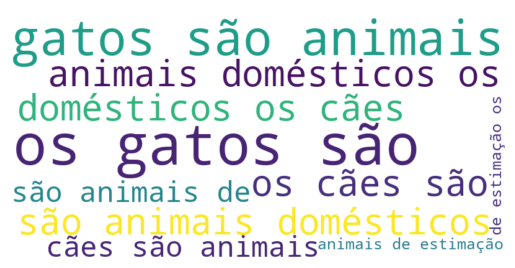

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# obter os n-gramas mais frequentes
ngramas_mais_comuns = sorted(frequencia.items(), key=lambda x: x[1], reverse=True)[:10]

# criar a nuvem de palavras
nuvem_palavras = WordCloud(
              width=800,
              height=400,
              background_color='white'
).generate_from_frequencies(dict(ngramas_mais_comuns))

# plotar a nuvem de palavras
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()